### Plant Seedling Classification
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.
2. Data Pre-processing:
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible:
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN:
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix.
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation,GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
tf.__version__

'2.4.1'

### Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
project_path = '/content/drive/My Drive/Colab/dataset/'
image_file = project_path + 'images.npy'
labels_file = project_path + 'Labels.csv'
lab_data = pd.read_csv(labels_file)
lab_data.shape

(4750, 1)

In [ ]:
lab_data.head(2)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill


In [ ]:
import csv
file_CSV = open(labels_file)
data_CSV = csv.reader(file_CSV)
list_CSV = list(data_CSV)
#removing column name at arry[0]
list_CSV.pop(0)
trainLabel = pd.DataFrame(list_CSV)

In [ ]:
img_data = np.load(image_file)
img_data.shape

(4750, 128, 128, 3)

In [ ]:
# Normalization of images
#img_data = img_data.astype('float32') / 255.0

# visualize image

<function matplotlib.pyplot.show>

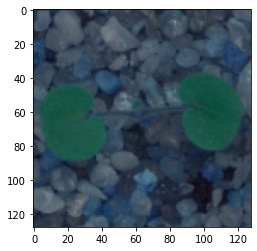

In [ ]:
image = img_data[0]
plt.imshow(image)
plt.show

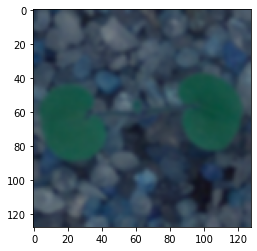

In [ ]:
## GaussianBlur
import cv2
blur = cv2.GaussianBlur(image,(5,5),0)
plt.imshow(blur)

<function matplotlib.pyplot.show>

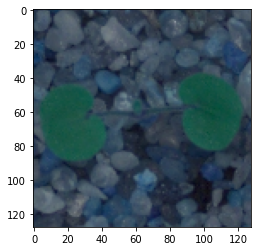

In [ ]:
plt.imshow(image/255.00)
plt.show

In [ ]:
len(img_data)

4750

** Re-sizing not required , however am doing it **



In [ ]:
# Re-sizing not required , how ever am doing it 
import cv2
trainImg = [] # Initialize empty list to store the image data as numbers.
num = len(img_data)
# Obtain images and resizing
for img in img_data:
  trainImg.append(cv2.resize(img, dsize=(128, 128)))
# Images set
trainImg = np.asarray(trainImg)

In [ ]:
print(trainImg.shape)
print(trainLabel.shape)

(4750, 128, 128, 3)
(4750, 1)


1. Total number of labels : 4750 , one column
2. Total number of images : 4750 (Res: 128X128) 
3. (3) Color image


In [ ]:
trainLabel[0].value_counts

<bound method IndexOpsMixin.value_counts of 0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: 0, Length: 4750, dtype: object>

# visualize a portion of images to make sure they're correctly loaded with Lable name

Text(0.5, 1.0, 'Small-flowered Cranesbill')

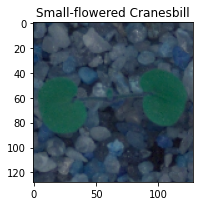

In [ ]:
f = plt.figure(figsize=(20, 20))
f.add_subplot(2, 6, 1)
plt.imshow(trainImg[0])
plt.title(trainLabel[0][0])

Text(0.5, 1.0, 'Fat Hen')

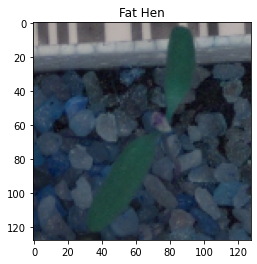

In [ ]:
f.add_subplot(2, 6, 2)
plt.imshow(trainImg[499])
plt.title(trainLabel[0][499])

Text(0.5, 1.0, 'Loose Silky-bent')

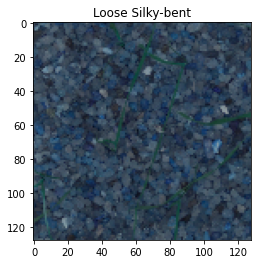

In [ ]:
f.add_subplot(1, 6, 6)
plt.imshow(trainImg[4749])
plt.title(trainLabel[0][4749])

# Visualization of Image

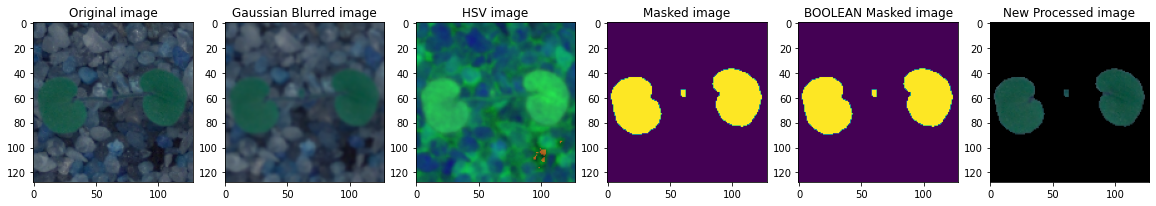

In [ ]:
trainImg_new = []
sets = []; getEx = True

for i in trainImg:
    # Gaussian Blurred image
    blurr = cv2.GaussianBlur(i,(5,5),0)
    # HSV image
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    #Green Parameters
    sensitivity = 35
    lower  = np.array([60 - sensitivity, 100, 50])
    upper = np.array([60 + sensitivity, 255, 255])
    
    #Masked image
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    
    #Boolean image
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    trainImg_new.append(new)
    
    if getEx:
        f = plt.figure(figsize=(20, 20))
        f.add_subplot(1,6,1);plt.imshow(i);plt.title('Original image') # Original image
        f.add_subplot(1,6,2);plt.imshow(blurr);plt.title('Gaussian Blurred image') # Blurred image
        f.add_subplot(1,6,3);plt.imshow(hsv);plt.title('HSV image') # HSV image
        f.add_subplot(1,6,4);plt.imshow(mask);plt.title('Masked image') # Masked image
        f.add_subplot(1,6,5);plt.imshow(boolean);plt.title('BOOLEAN Masked image') # BOOLEAN Masked image
        f.add_subplot(1,6,6);plt.imshow(new);plt.title('New Processed image') # New Processed image
        getEx = False
        
trainImg_new = np.asarray(trainImg_new)

In [ ]:
trainImg_new.shape

(4750, 128, 128, 3)

In [ ]:
#import plotly.graph_objs as go
#trainLabel
#fig = go.Figure([go.Bar(x=trainImg_new, y=trainLabel,text=trainImg_new)])
#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#fig.update_layout(title = 'No. of images per plant species')
#fig.show()

**Convert labels to one-hot-vectors**

In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(trainLabel[0])

LabelEncoder()

In [ ]:
encodedlabel = labels.transform(trainLabel[0])
convertedlabels = np_utils.to_categorical(encodedlabel)
classes = convertedlabels.shape[1]
print(classes)

12


*** Normalization of images ***

In [ ]:
# normalization of images
trainImg_new = trainImg_new.astype('float32') / 255.0

** split images and labels into training and testing set with test_size = 0.3 **
* Add the lables and images for traingin *

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(trainImg_new,convertedlabels,test_size=0.3,random_state=38,stratify=convertedlabels)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


*** Further split test data into test and validation set with test_size = 0.5 ***

---



In [ ]:
X_val,X_test_new,y_val,y_test_new = train_test_split(X_test,y_test,test_size=0.5,random_state=38,stratify=y_test)
print(X_val.shape)
print(y_val.shape)
print(X_test_new.shape)
print(y_test_new.shape)

(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
print ( labels.classes_[0] , "," ,labels.classes_[11] )

Black-grass , Sugar beet


*** it’s already in compatible shape, re-shape is not required ***

# Building CNN Model

1.  Convolution layers (2)
2.  (filters=64 / 128 , kernel_size=(3, 3) Activation='relu')
3.  ( 2 ) dense layers (128 / 64, activation='relu')
4.  loss='categorical_crossentropy', optimizer='adam'
5.  model compile with ImageDataGenerator to minimize overfitting.


In [ ]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)           

In [ ]:
history = model.fit(generator.flow(X_train,y_train,batch_size=10),epochs=200, verbose=2,shuffle=True,validation_data=(X_val,y_val))
pd.DataFrame(history.history)

Epoch 1/200
333/333 - 13s - loss: 2.0946 - accuracy: 0.2611 - val_loss: 1.7696 - val_accuracy: 0.3806
Epoch 2/200
333/333 - 12s - loss: 1.7062 - accuracy: 0.4024 - val_loss: 1.4212 - val_accuracy: 0.5506
Epoch 3/200
333/333 - 12s - loss: 1.5509 - accuracy: 0.4514 - val_loss: 1.3464 - val_accuracy: 0.5758
Epoch 4/200
333/333 - 12s - loss: 1.5004 - accuracy: 0.4704 - val_loss: 1.3370 - val_accuracy: 0.5646
Epoch 5/200
333/333 - 12s - loss: 1.4182 - accuracy: 0.4920 - val_loss: 1.3073 - val_accuracy: 0.5604
Epoch 6/200
333/333 - 12s - loss: 1.3784 - accuracy: 0.5236 - val_loss: 1.2041 - val_accuracy: 0.6039
Epoch 7/200
333/333 - 12s - loss: 1.3096 - accuracy: 0.5474 - val_loss: 1.1686 - val_accuracy: 0.6306
Epoch 8/200
333/333 - 12s - loss: 1.2718 - accuracy: 0.5561 - val_loss: 1.2511 - val_accuracy: 0.5843
Epoch 9/200
333/333 - 12s - loss: 1.2627 - accuracy: 0.5600 - val_loss: 1.1125 - val_accuracy: 0.6503
Epoch 10/200
333/333 - 12s - loss: 1.2358 - accuracy: 0.5708 - val_loss: 1.0960 - 

In [ ]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [ ]:
scores = model.evaluate(X_test_new, y_test_new)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Confusion Matrix



###  CF Function

In [ ]:
# confusion matrix function

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
# Predict the values from the test data
y_pred = model.predict(X_test_new)
y_pred_Classes = np.argmax(y_pred, axis = 1)
trueY = np.argmax(y_test_new, axis = 1)

# Confusion matrix
confusionMTX = confusion_matrix(trueY, y_pred_Classes)
# Plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes=labels.classes_)

# Score and Accuracy

In [ ]:
#Final score and accuracy of the model

score, acc = model.evaluate(X_test_new,y_test_new)
score1, acc1 = model.evaluate(X_train,y_train)
print('Test score:', score,'   Test accuracy:', acc)
print('Train score:', score1,'   Train accuracy:',acc1)

** Model with training accuracy of 90% while testing accuracy 88%. **




# Visualize predictions
 > try to predict one image

In [ ]:
test_images_arr_1 = []
test_images_arr_1.append(img_data[0])
test_XX = np.asarray(test_images_arr_1)
# Normalization of the Image Data
test_XX = test_XX.astype('float32') / 255
predictions = model.predict(test_XX)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]
print(pred_str)

## Get all test Image Name
x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]


In [ ]:
test_images_arr = []
test_images_arr.append(img_data[2])
test_images_arr.append(img_data[3])
test_images_arr.append(img_data[33])
test_images_arr.append(img_data[36])
test_images_arr.append(img_data[59])

test_X = np.asarray(test_images_arr)
# Normalization of the Image Data
test_X = test_X.astype('float32') / 255
predictions = model.predict(test_X)
preds = np.argmax(predictions, axis=1)
pred_str = labels.classes_[preds]
print(pred_str)